In [1]:
%load_ext version_information

In [2]:
# Include version information for future reference
%version_information matplotlib, numpy, pandas, scipy, seaborn

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.14393
matplotlib 1.5.3
numpy 1.11.1
pandas 0.19.1
scipy 0.18.1
seaborn 0.7.1
Mon Feb 27 17:07:21 2017 Mountain Standard Time

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import bokeh.plotting as bkp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import norm

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [6]:
# Get rid of the value trying to be set on a copy warning 
#clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.astype({'Number of Discharges': 'int'})

In [7]:
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [8]:
# commented out the original code that was replaced with the above code to get rid of the warning statement

# deal with missing and inconvenient portions of data 
#clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

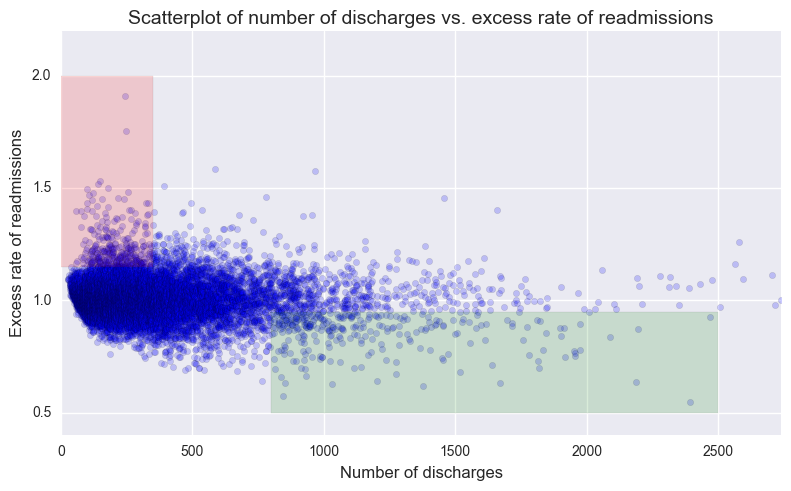

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## **Comments on Preliminary Analysis**

- A. Initial Observations
    - The word "trend" typically refers to time.  The independent variable in this case is not time related.  Therefore, I do not think the word "trend" applies to this plot.
    - There is no clear correlation between the Number of Discharges and the Excess Readmission Ratio.  There is no "best fit line". What we observe is a cluster of data points. 
    - The y-axis is labeled as "Excess Rate of Readmissions".  The actual data is the readmission ratio.  There is a difference between rate and ratio.  This label is misleading.
    - The title is incorrect.  Usually the independent variable is on the x-axis and the dependent variable is on the y-axis and the title would be "Plot of y vs. x".
    - When looking at the plot, it appears as though there are equal number of dots above the 1.0 line as below the 1.0 line.  Since there is a heavy group of dots that create a solid color, you cannot discern the number of points in that area. For these reasons, it is not clear from this plot what the relationship is between the number of discharges and readmissions ratio.
    - The advantage of using a scatter plot is that every point is represented.  One can easily immediately discern if there is any obvious correlations between the x and y axis.  If, for example, the points congregate around an imaginary line, then one can easily discern the correlation.  The disadvantage of the scatterplot occurs when you have a very large number of data points and they create a blob and do not take on an obvious shape.  Line plots and box plots are the easiest for the reader to interpret quickly and without too much effort.
    
- B. Statistics
    - The analysis shows that when we identify the top 5% performing hospitals (the hospitals with the lowest readmission rates), the discharges numbers for the treatments of COPD and pneumonia are less than 500.  The discharge numbers for heart attack and heart failure are roughly less than 1000.  Only in the treatment group for hip and knee replacement do we see hospital discharge numbers of roughly less than 2400.  We cannot make general statements about hospital size without considering the treatment group.
    
- C. Conclusions
    - The scatter plot does not show an obvious correlation between number of discharges and excess readmission ratios.  And when we identify the top performers, for all treatment groups except hip and knee replacement, those hospitals have discharge numbers roughly less than 1000.  We cannot conclude that smaller hospitals, in general, do not have the resources to provide quality care.
    
- D. Regulatory Policy Recommendations
    - The median number of discharges for the hospitals as a whole is 282 and the average is 365.  53% of the hospitals have discharge numbers less than 300.  It is unrealistic and inadvisable to implement a policy that could negatively affect such a large proportion of hospitals. One of the unintended consequences would be to leave people living in rural areas with no access to emergency medical care.  For treatments such as heart attack where lack of treatment could be fatal, the result would be a reduction in access to quality care.  

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [10]:
# Your turn

Due to the lengthiness of the notebook, I have included a Table of Contents.

   - I. Data Inspection, Cleaning and Calculating
   - II. Checking Distributions
       - A. Actual, Predicted, and Expected Readmission Rates
       - B. Actual, and Excess Readmission Ratios
   - III. Better Plots for Illustrating Data Correlations
   - IV. Statistical Analysis
       - A. Identify the means and their confidence intervals for each treatment group
       - B. Perform a difference in means hypothesis test
       - C. Perform a Chi Squared Statistic Analysis on observed vs. expected numbers of readmissions
   - V. Identify Top and Bottom Performing Hospitals
   - VI. Conclusions and Recomendations

## I. Data Inspection, Cleaning, and Calculating

In [11]:
# Take a peek at the data
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


What we need to know about the data (from cms.gov and medicare.gov):

* Excess Readmission Ratio = Predicted Readmission Rate/Expected Readmission Rate.  "Expected" Readmission Rate is based on the average rate of hospitals with like patients.
* The Predicted Readmission Rate and Expected Readmission Rate are the number of readmissions per 100 discharges. In other words, they are percentages.
* The Expected Readmission Rate is based on the national average of hospitals with like patients. 
* The Predicted Readmission Rate is based on data from the individual hospital and is also referred to as “Adjusted Actual Readmissions”.
* Reduction in funding is done by treatment and is capped at 3%. The treatments included are heart attack, heart failure, pneumonia, COPD, and hip and knee replacements.
* Hospitals with fewer than 25 discharges were excluded.
* Data was collected over a 3 year period.

In [12]:
# check the data for null entries
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

There are 81 rows with null data that need to be removed.

In [13]:
# check data types
clean_hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges            int32
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [14]:
# Let's do some more clean up and work on the dataframe
# Let's change the names of the columns to make coding easier
clean_hospital_read_df = clean_hospital_read_df.rename(columns={'Hospital Name':'hospital', 'Provider Number': 'provider_num', 'Measure Name': 'measure_name', 'Number of Discharges': 'num_discharges', 'Excess Readmission Ratio': 'excess_readmit_ratio', 'Predicted Readmission Rate': 'predict_readmit_rate', 'Expected Readmission Rate': 'expect_readmit_rate', 'Number of Readmissions': 'num_readmits', 'Start Date': 'start_date', 'End Date': 'end_date'})

# delete the footnotes column for now so we can use the dropna method for the other rows with null data
del clean_hospital_read_df['Footnote']

# drop the rows with null data
clean_hospital_read_df = clean_hospital_read_df.dropna()

# recheck the dataframe 
clean_hospital_read_df.isnull().sum()

hospital                0
provider_num            0
State                   0
measure_name            0
num_discharges          0
excess_readmit_ratio    0
predict_readmit_rate    0
expect_readmit_rate     0
num_readmits            0
start_date              0
end_date                0
dtype: int64

Data frame successfully cleaned up.

In [15]:
# Calculate actual numbers so we can compare them with the expected numbers as in a Chi squared hypothesis test.
# Calculate the actual rate of readmissions:  num_readmits/num_discharges
clean_hospital_read_df['actual_readmit_rate'] = (clean_hospital_read_df.num_readmits 
                                                    /clean_hospital_read_df.num_discharges*100)

# Calculate the actual readmissions ratio:    actual_readmit_rate/expected_readmit_rate 
clean_hospital_read_df['actual_readmit_ratio'] = (clean_hospital_read_df.actual_readmit_rate
                                                    /clean_hospital_read_df.expect_readmit_rate)

# Calculate the raw number of expected readmissions: expect_readmit_rate/100 * num_discharges
clean_hospital_read_df['expect_num_readmits'] = ((clean_hospital_read_df.expect_readmit_rate/100) 
                                                     * clean_hospital_read_df.num_discharges )

In [16]:
clean_hospital_read_df['log_actual_readmit_rate'] = np.log(clean_hospital_read_df.num_readmits 
                                                    /clean_hospital_read_df.num_discharges*100)

In [17]:
# look at results to see if it looks reasonable
clean_hospital_read_df.head()

,hospital,provider_num,State,measure_name,num_discharges,excess_readmit_ratio,predict_readmit_rate,expect_readmit_rate,num_readmits,start_date,end_date,actual_readmit_rate,actual_readmit_ratio,expect_num_readmits,log_actual_readmit_rate
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,48.000000,1.951220,6.150,3.871201
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,44.444444,1.966568,6.102,3.794240
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,42.857143,1.921845,6.244,3.757872
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,37.931034,1.965339,5.597,3.635770
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,43.333333,2.073365,6.270,3.768922


Let's explore a few statistics in order to understand the comments in the preliminary report and better understand the data.

In [18]:
# How many hospitals have an excess readmission ratio greater than 1
num_hosp_ratio_morethan1 = len(clean_hospital_read_df[clean_hospital_read_df.excess_readmit_ratio > 1.0])
num_hosp_ratio_morethan1

5939

In [19]:
# How many hospitals are there total in the study?
total_hospitals = len(clean_hospital_read_df)
total_hospitals

11497

In [20]:
# What is the percentage of hospitals that have an excess readmission ratio greater than 1.0?
float(num_hosp_ratio_morethan1)/total_hospitals * 100

51.656953987996864

More than half the hospitals have excess readmission ratios greater than 1.0.  All these hospitals will be targeted for reimbursement reductions.  That seems like an awfully large percentage of hospitals.

In [21]:
# How many hosiptals have discharge rates lower than 300?
num_hosp_lessthan300 = len(clean_hospital_read_df[clean_hospital_read_df.num_discharges < 300])

In [22]:
# what is the percentage of hospitals that would be targeted for possible discontinuation of services?
float(num_hosp_lessthan300)/total_hospitals * 100

53.12690267026181

More than half of the hospitals have discharge rates less than 300.  That is a lot of hospitals to consider for discontinuation of services.

In [23]:
# what is the average number of discharges for all the hospitals?
avg_discharge = clean_hospital_read_df.num_discharges.mean()
avg_discharge

365.4662085761503

In [24]:
# what is the median number of discharges for all the hospitals?
median_discharge = clean_hospital_read_df.num_discharges.median()
median_discharge

282.0

If the hospital capacity is inferred from the number of discharges, then we can say that targeting hospitals with less than 300 number of discharges for discontinuation of services is not reasonable.

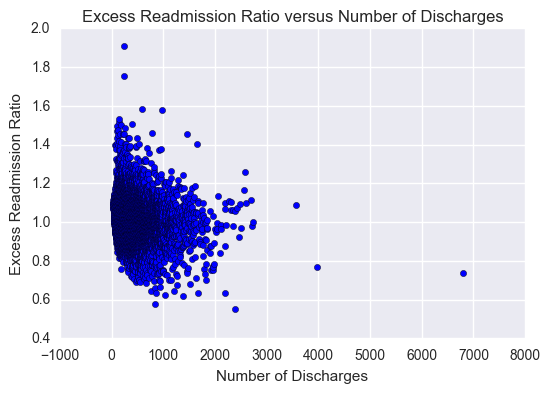

In [25]:
# let's see what the scatter plot looks like with the cleaned up dataframe
plt.scatter(x=clean_hospital_read_df.num_discharges, y= clean_hospital_read_df.excess_readmit_ratio, data=clean_hospital_read_df)
plt.title('Excess Readmission Ratio versus Number of Discharges')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

This looks different than the preliminary report scatter plot.  The code for the x and y axis using the for loop and the lists function did not produce the intended plot which was to plot the Excess Readmission Ratio versus Number of Discharges.  From this plot, we can see that there are very few hospitals with more than 3000 discharges.  For the lower number of discharges, it does appear that there are more high excess readmission ratios and more of them.  However, there is still no "clear" correlation between number of discharges and excess readmission ratio.  We just see a cluster of data points.

## II. Checking Distributions 
###    - A. Distributions of Actual, Predicted and Expected Readmission Rates

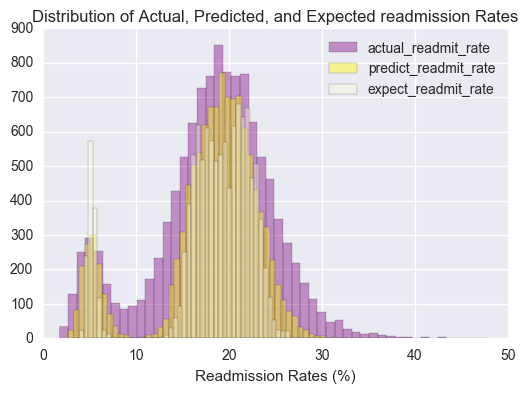

In [26]:
# let's look at the distribution of the actual, expected, and predicted readmission rates
sns.distplot(clean_hospital_read_df.actual_readmit_rate, kde=False, color='purple', label='actual_readmit_rate')
sns.distplot(clean_hospital_read_df.predict_readmit_rate, kde=False, color='yellow', label= 'predict_readmit_rate')
sns.distplot(clean_hospital_read_df.expect_readmit_rate, kde=False, color='lightyellow', label= 'expect_readmit_rate')
plt.legend()
plt.title('Distribution of Actual, Predicted, and Expected readmission Rates')
plt.xlabel('Readmission Rates (%)')
plt.savefig('dist_rates.png')

We observe that this appears to be a bimodal distribution.  There is one group that has a readmission rate mean around 5% and another group that has a readmission rate mean of around 20%. Notice that the distribution of "expected" rates as defined by the government is the most narrow.  The "predicted" rates as reported by the hospital are a little wider and the "actual" rates are the widest.

### - B. Distribution of Actual and Expected Readmission Ratios

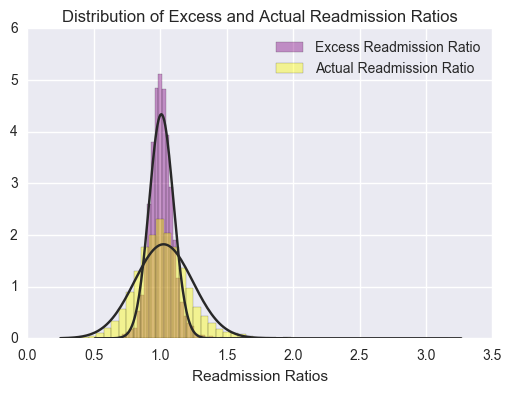

In [27]:
sns.distplot(clean_hospital_read_df.excess_readmit_ratio, kde=False,fit=norm, color='purple', label='Excess Readmission Ratio')
sns.distplot(clean_hospital_read_df.actual_readmit_ratio, kde=False,fit=norm, color= 'yellow', label='Actual Readmission Ratio')
plt.title('Distribution of Excess and Actual Readmission Ratios')
plt.legend()
plt.xlabel('Readmission Ratios')
plt.savefig('dist_ratios.png')

The "expected" readmission ratios are very tight around 1.0 whereas the "actual" readmission ratios have a much wider spread. This may be an indication that the "expected" rates are unreasonable.  

## III. Better Plots for Illustrating Data Correlations

In [28]:
# let's look at the Measure Name data
clean_hospital_read_df.groupby('measure_name').size()

measure_name
READM-30-AMI-HRRP         1777
READM-30-COPD-HRRP        2727
READM-30-HF-HRRP          2833
READM-30-HIP-KNEE-HRRP    1371
READM-30-PN-HRRP          2789
dtype: int64

The readmission data can be grouped by the medical procedure measured.  The groups are: chronic obstructive pulmonary disease (COPD);  elective total hip arthroplasty and total knee arthroplasty (HIP-KNEE), acute myocardial infarction (AMI), heart failure (HF), and pneumonia (PN);

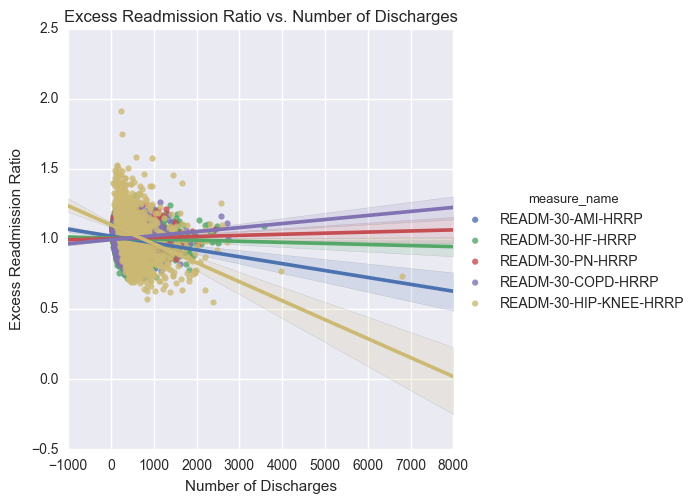

In [29]:
# let's plot the excess readmission rate against the number of discharges for each group of measures
sns.lmplot(x="num_discharges", y="excess_readmit_ratio", hue='measure_name', fit_reg='True', data=clean_hospital_read_df)
plt.title('Excess Readmission Ratio vs. Number of Discharges')
plt.xlabel('Number of Discharges')
plt.ylabel("Excess Readmission Ratio")
plt.savefig('excessratio_vs_dischares.png')

The above plot does a better job illustrating a correlation between number of discharges and excess readmission ratios.  It illustrates that for three of the treatment groups, there is a small positive correlation between number of discharges and excess readmission ratio (pneumonia, heart failure, and copd), and that for two treatment groups there is a negative correlation (hip and knee replacements, and hert attack). This plot, however, does not tell the whole story.

To be understand the data, the approach here will be to focus on the actual readmission rates and compare those to the expected readmission rates.

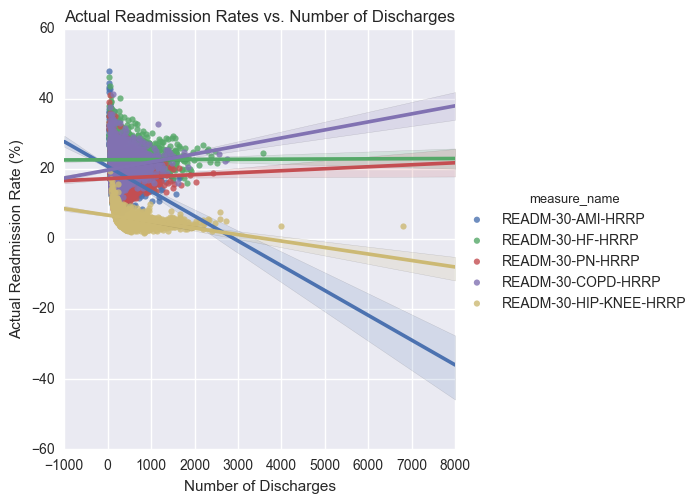

In [30]:
# let's plot the actual readmission rate against the number of discharges for each group of measures
sns.lmplot(x="num_discharges", y="actual_readmit_rate", hue='measure_name', fit_reg='True', data=clean_hospital_read_df)
plt.title('Actual Readmission Rates vs. Number of Discharges')
plt.xlabel('Number of Discharges')
plt.ylabel("Actual Readmission Rate (%)")

The number of discharges is an indication of hospital size as larger hospitals treat more patients and have more discharges.  The readmission rate decreases as hospital size increases for treatment of heart attacks and total knee and hip replacement. However, for treatment of heart failure, and pneumonia, the treatment does not appear to be significantly affected by hospital size. In the case of COPD, the readmission rate increases slightly as the size of the hospital increases indicating smaller hospitals may do a better job of treating COPD patients.

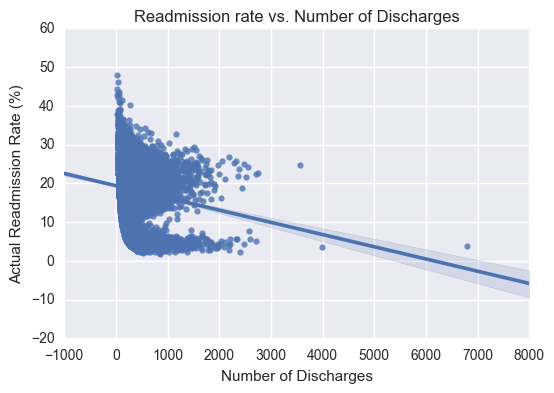

In [31]:
# let's see what the graph looks like when the treatment types are not grouped
sns.regplot(x="num_discharges", y="actual_readmit_rate", data=clean_hospital_read_df)
plt.title('Readmission rate vs. Number of Discharges')
plt.xlabel('Number of Discharges')
plt.ylabel('Actual Readmission Rate (%)')
fig.tight_layout()


This graph is misleading as it may lead one to believe that larger hospitals have lower readmission rates in general for all treatment groups.

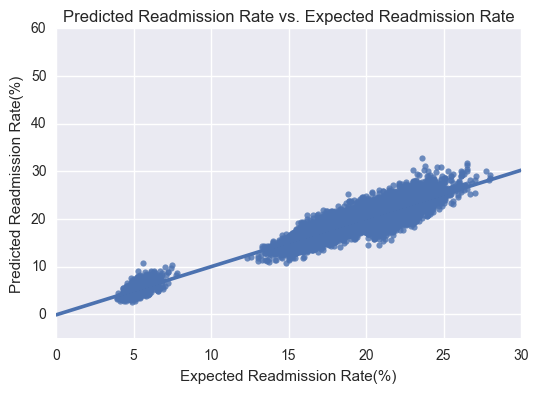

In [32]:
# Let's plot the predict_readmit_rate (hospital  produced) versus the expected_readmit rate (Govt produced)
plt.axis([0,30,-5,60])
sns.regplot(x="expect_readmit_rate", y="predict_readmit_rate", data=clean_hospital_read_df)
plt.title('Predicted Readmission Rate vs. Expected Readmission Rate')
plt.xlabel('Expected Readmission Rate(%)')
plt.ylabel('Predicted Readmission Rate(%)')
plt.savefig('pred_vs_exp_rates.png')

About half  of the "predicted" readmission rates are higher than the "expected" readmission rates and half are below the "expected" rates. The line occurs where the "predicted" and "expected" rates are equal.   

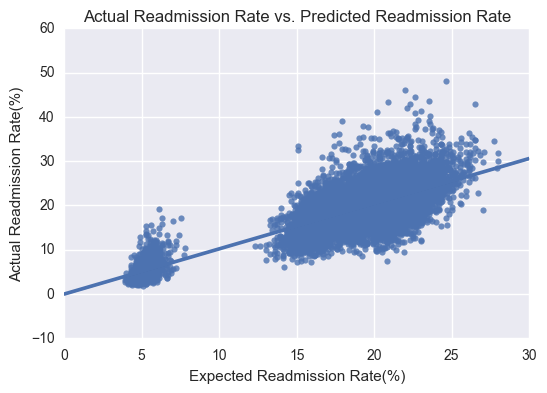

In [33]:
sns.regplot(x="expect_readmit_rate", y="actual_readmit_rate", data=clean_hospital_read_df)
plt.title('Actual Readmission Rate vs. Predicted Readmission Rate')
plt.xlabel('Expected Readmission Rate(%)')
plt.ylabel('Actual Readmission Rate(%)')
plt.savefig('actual_vs_exp_rates.png')

When comparing this plot to the previous plot, several thoughts occur:

- The actual readmission rates are either higher or lower than the predicted readmission rates in about half the cases.
- The points sitting "higher" above the line represent actual readmission rates that are higher than the "predicted" readmission rate.  The "predicted" readmission rate is a number that is also referred to as the adjusted actual rate.  Why is the reported "predicted" rate lower than the "actual" rate? Are the hospitals under reporting their rates in an effort to keep their ratio number closer to or below 1.0?
- The points sitting "lower" below the line represent actual readmission rates that are lower than their "predicted" readmission rate.  In this case, are the hospitals using worst case scenario prediction numbers in an effort to keep their actual ratios lower?
- We see that there are some "stray" data points extending above the bulbous masses.  These are the data points that need to be targeted for improvement in reducing hospital admissions.  We would expect in a "normal" world for there to be points above and below the line.  The points that stray the farthest above the line are the "poorest" performers.

In [34]:
# let's look at the distribution of the actual readmission rates by treatment group
# Stratify the data
ami_df = clean_hospital_read_df[clean_hospital_read_df.measure_name == 'READM-30-AMI-HRRP']
hf_df = clean_hospital_read_df[clean_hospital_read_df.measure_name == 'READM-30-HF-HRRP']
pn_df = clean_hospital_read_df[clean_hospital_read_df.measure_name == 'READM-30-PN-HRRP']
copd_df = clean_hospital_read_df[clean_hospital_read_df.measure_name == 'READM-30-COPD-HRRP']
hip_knee_df = clean_hospital_read_df[clean_hospital_read_df.measure_name == 'READM-30-HIP-KNEE-HRRP']

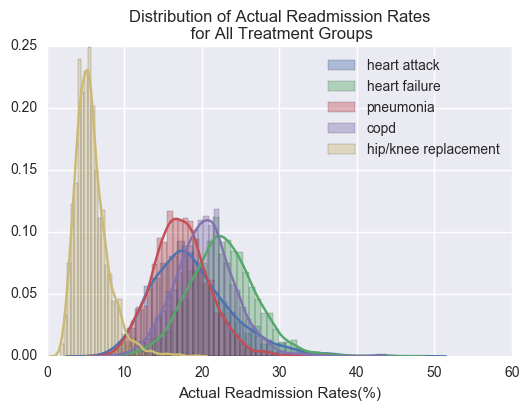

In [35]:
# let's see what the distribution of actual readmission rates looks like for each treatment group

sns.distplot(ami_df.actual_readmit_rate, label='heart attack')  #, kde=False, fit=norm)
sns.distplot(hf_df.actual_readmit_rate, label  = 'heart failure')  #, kde=False, fit=norm)
sns.distplot(pn_df.actual_readmit_rate, label= 'pneumonia')  #, kde=False, fit=norm)
sns.distplot(copd_df.actual_readmit_rate, label= 'copd')  #, kde=False, fit=norm)
sns.distplot(hip_knee_df.actual_readmit_rate, label= 'hip/knee replacement')  #, kde=False, fit=norm)


plt.title('Distribution of Actual Readmission Rates\n for All Treatment Groups')
plt.xlabel('Actual Readmission Rates(%)')
plt.legend()
plt.savefig('dist_actual_readmit_rates.png')


The distributions are not symmetrical; the tails on the right sides are longer and the slopes on one side are steeper. The distributions are not normal. Intuitively, it makes sense that there would be more data to the right of the center of the distribution because the  number of readmissions can only go as low as zero whereas there is no limit on how far from the center the data can go in the positive direction. 

We now see that the distribution of the data as a whole is actually multi-modal, not binomal.

Let's check the distributions of a few of the groups to see whether the mean or median more accurately represent the center of the distribution. If the median is a more accurate representation of the center of the distribution, then we may need to use a non-parametric test.

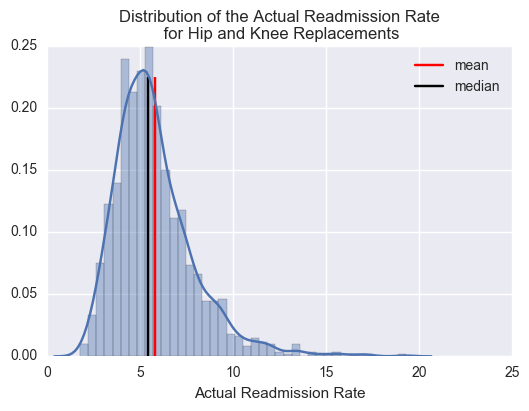

In [36]:
sns.distplot(hip_knee_df.actual_readmit_rate)  #, kde=False, fit=norm)
plt.vlines(x=hip_knee_df.actual_readmit_rate.mean(), ymin=0, ymax= 0.225, color='red', label='mean')
plt.vlines(x=hip_knee_df.actual_readmit_rate.median(), ymin=0, ymax= 0.225, label = 'median')
plt.title('Distribution of the Actual Readmission Rate\n for Hip and Knee Replacements')
plt.xlabel('Actual Readmission Rate')
plt.legend()

The median more closely represents the center of the distribution for hip and knee replacements. 

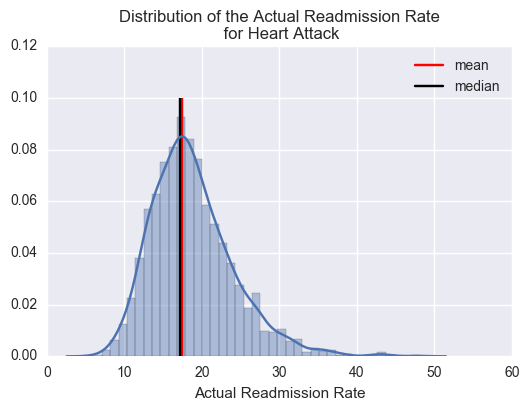

In [37]:
sns.distplot(ami_df.actual_readmit_rate)  #, kde=False, fit=norm)
plt.vlines(x=pn_df.actual_readmit_rate.mean(), ymin=0, ymax= 0.1, color='red', label='mean')
plt.vlines(x=pn_df.actual_readmit_rate.median(), ymin=0, ymax= 0.1, label='median')
plt.title('Distribution of the Actual Readmission Rate\n for Heart Attack')
plt.xlabel('Actual Readmission Rate')
plt.legend()

The median also more closely represents the center of the distribution for Heart Attack.

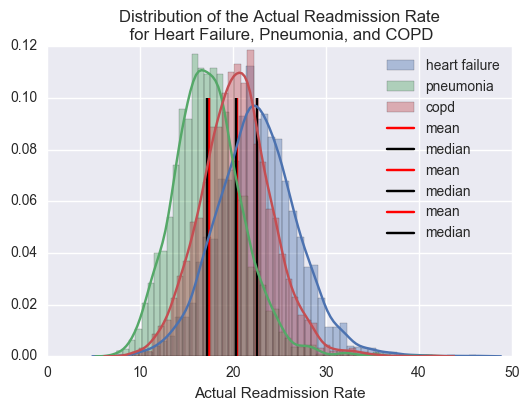

In [38]:
sns.distplot(hf_df.actual_readmit_rate, label= 'heart failure')  #, kde=False, fit=norm)
sns.distplot(pn_df.actual_readmit_rate, label= 'pneumonia')
sns.distplot(copd_df.actual_readmit_rate, label= 'copd')
plt.vlines(x=hf_df.actual_readmit_rate.mean(), ymin=0, ymax= 0.1, color='red', label='mean')
plt.vlines(x=hf_df.actual_readmit_rate.median(), ymin=0, ymax= 0.1, label='median')
plt.vlines(x=pn_df.actual_readmit_rate.mean(), ymin=0, ymax= 0.1, color='red', label='mean')
plt.vlines(x=pn_df.actual_readmit_rate.median(), ymin=0, ymax= 0.1, label='median')
plt.vlines(x=copd_df.actual_readmit_rate.mean(), ymin=0, ymax= 0.1, color='red', label='mean')
plt.vlines(x=copd_df.actual_readmit_rate.median(), ymin=0, ymax= 0.1, label='median')
plt.title('Distribution of the Actual Readmission Rate\n for Heart Failure, Pneumonia, and COPD')
plt.xlabel('Actual Readmission Rate')
plt.legend()

For Heart Failure, Pneumonia, and COPD, there is no appreciable difference in the mean and the median.  We do not need to consider using non-parametric testing. 

Now that we know the distributions are not normal, what shall we do about it?  
- First, we could look for outliers to see if the outliers are affecting the distribution.  In this case, we have no way of knowing if the data was mis-recorded or in error, so we will accept it as reliable data.
- Second, we can try to transform the data or "normalize" it so that we can continue to use statistic theories that rely on the assumption of normality. One way to "normalize" the data is to take the log of the data. 
- Third, even if our data is not normal, many of the parametric tests are still robust to the normality assumption especially for large sample sizes such as is our case here.
- Fourth, we could consider using nonparametric testing such as the One-Sample Sign test or Wilcoxon Signed Ranks that can be used for data that is non-normal and assymetric. In the case where the median more closely represents the center of the distribution, nonparametric tests may be in order.

Let's try using the Log of the Data.

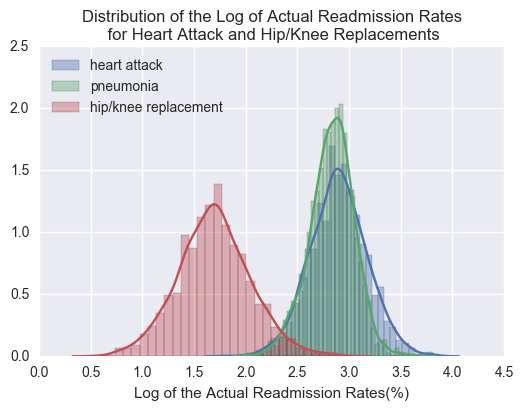

In [39]:
# plot the distribution of the log of the actual readmission rates for all treatment groups
sns.distplot(ami_df.log_actual_readmit_rate, label='heart attack')  #, kde=False, fit=norm)
#sns.distplot(hf_df.log_actual_readmit_rate, label  = 'heart failure')  #, kde=False, fit=norm)
sns.distplot(pn_df.log_actual_readmit_rate, label= 'pneumonia')  #, kde=False, fit=norm)
#sns.distplot(copd_df.log_actual_readmit_rate, label= 'copd')  #, kde=False, fit=norm)
sns.distplot(hip_knee_df.log_actual_readmit_rate, label= 'hip/knee replacement')  #, kde=False, fit=norm)
plt.title('Distribution of the Log of Actual Readmission Rates\n for Heart Attack and Hip/Knee Replacements')
plt.xlabel('Log of the Actual Readmission Rates(%)')
plt.legend(loc='best')
plt.savefig('dist_log_actual_readmit_rates')

We observe that the log of the Actual Readmission Rate for Heart Attack. Pneumonia, and Hip and Knee Replacements, while not "normal", are at least more symmetrical.  Therefore, we may consider using the log of the data in these cases.

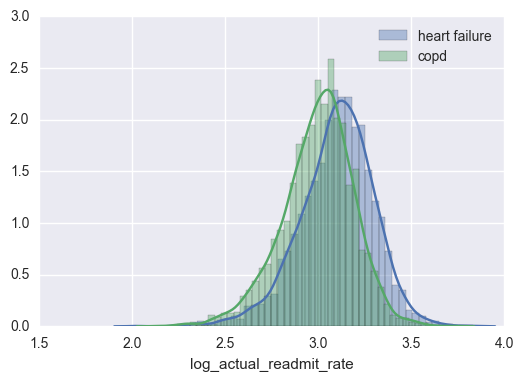

In [40]:
sns.distplot(hf_df.log_actual_readmit_rate, label  = 'heart failure')  #, kde=False, fit=norm)

sns.distplot(copd_df.log_actual_readmit_rate, label= 'copd')  #, kde=False, fit=norm)
plt.legend()

The log of the data for these three groups did not result in an obviously more symetrical distribution.  Therefore, we will not use this approach for these groups.

In [41]:
# Store these dataframes for use in another notebook, HospitalReadmitDataExplore.ipynb, for exploring these non-normal distributions
%store ami_df
%store hf_df
%store pn_df
%store copd_df
%store hip_knee_df

Stored 'ami_df' (DataFrame)
Stored 'hf_df' (DataFrame)
Stored 'pn_df' (DataFrame)
Stored 'copd_df' (DataFrame)
Stored 'hip_knee_df' (DataFrame)


Results from the lab notebook, HospitalReadmitDataExplore.ipynb, used for exploring the data distributions:

The best "fits" for each group are:
* ami(heart attack): 
    * exponnorm, nct, genlogistic, johnsonu, alpha
* hf(heart failure): 
    * burr12, t, vonmises_line, turkeylambda, nct
* pn(pneumonia): 
    * burr12, exponnorm, johnsonu, burr, mielke
* copd(COPD): 
    * turkeylambda, burr12, t, vonmises_line, gennorm
* hip_and_knee(hip/knee replacements): 
    * fisk, burr, mielke, burr12, exponnorm

The t-test is very robust for non-normal data that is from a large sample size and that is symmetrical.  The fact that the distribution of the data, in these cases, is skewed and asymmetrical may impact the results of a study that utilizes statistics theories based on the assumption of normality. For calculating the mean and the confidence intervals, the t-statistic should suffice since our data samples are large.  However, for determining deviations from the mean, we may need to make accommodations for the skewness in the distributions. For this reason, as a quick fix, we will take the log of the data for the heart attack, pneumonia, and hip and knee replacement groups. Since the t distribution is listed as one of the "best" fit choices for the copd and heart failure groups, we will not do any transformation on those groups.

# IV. Statistical Analysis

##  A. Calculate the Means and Confidence Intervals for the Actual Readmission Rates for each Treatment Group

In [42]:
# create a dictionary of the five treatment group dataframes so we can perform statistical studies on each group
dict_of_df = ({'Heart Attack': ami_df, 'Heart Failure': hf_df , 'Pneumonia':pn_df , 
               'COPD': copd_df,  'Hip and Knee Replacements': hip_knee_df})

In [43]:
#What are the sizes of our data samples?
def get_size(dict_of_df):
    for key in dict_of_df:
        length = len(dict_of_df[key])
        print "length of {} is {}".format(key, length)
    return    

In [44]:
get_size(dict_of_df)

length of Hip and Knee Replacements is 1371
length of Pneumonia is 2789
length of Heart Attack is 1777
length of COPD is 2727
length of Heart Failure is 2833


Since we have large sample sizes, we invoke the Central Limit Theorem and know that the mean of the samples will be approximately equal to the mean of the population.

In [45]:
# create a function for finding the confidence interval such that we are 99% confident that the true mean
# lies within this interval.

def get_ci(data, alpha):
    t_critical = ss.t.ppf(q = 1.0 - alpha, df = len(data) - 1)
    margin_of_error = t_critical * (data.std()/len(data)**0.5)
    confidence_interval = (data.mean() - margin_of_error, data.mean() + margin_of_error)
    mean = data.mean()
    print('t_critical: {}'.format(t_critical))
    print('mean: {}'.format(mean))
    print("confidence interval: {}".format(confidence_interval))
    print("\n")
    return mean, confidence_interval                   

In [46]:
def get_ci_groups(dict_of_df, readmit_rate, alpha):
    dict_of_ci ={}
    for key in dict_of_df:
        print key
        dict_of_ci[key] = get_ci(dict_of_df[key][readmit_rate],alpha)
    return dict_of_ci

In [47]:
ci_actual_readmit_rate = get_ci_groups(dict_of_df, 'actual_readmit_rate', 0.01)

Hip and Knee Replacements
t_critical: 2.3290728761
mean: 5.79270001308
confidence interval: (5.6566554255705341, 5.9287446005883275)


Pneumonia
t_critical: 2.32768615477
mean: 17.4075470124
confidence interval: (17.2406135262353, 17.574480498510823)


Heart Attack
t_critical: 2.3284493926
mean: 18.7983659678
confidence interval: (18.503680336857464, 19.093051598778779)


COPD
t_critical: 2.32771660969
mean: 20.4198495168
confidence interval: (20.249008476960235, 20.590690556608621)


Heart Failure
t_critical: 2.32766535101
mean: 22.6091865618
confidence interval: (22.417895575996784, 22.800477547535326)




Let's compare these means to the "expected" means

In [48]:
ci_expect_readmit_rate = get_ci_groups(dict_of_df, 'expect_readmit_rate', 0.01)

Hip and Knee Replacements
t_critical: 2.3290728761
mean: 5.27257476295
confidence interval: (5.2403845750101548, 5.3047649508833503)


Pneumonia
t_critical: 2.32768615477
mean: 17.1754033704
confidence interval: (17.11529899665187, 17.235507744115484)


Heart Attack
t_critical: 2.3284493926
mean: 17.8817670231
confidence interval: (17.757861153222173, 18.005672892923016)


COPD
t_critical: 2.32771660969
mean: 20.2750275028
confidence interval: (20.209754392755684, 20.340300612744869)


Heart Failure
t_critical: 2.32766535101
mean: 22.310307095
confidence interval: (22.252953866645644, 22.367660323259063)




In all but one case (COPD), the confidence intervals do not even overlap. A  difference in means hypothesis test will most likely give us a p-value of less than 0.05 indicating that if the "expected" means were "correct", the likelihood of getting a mean from a sample that was observed is highly unlikely.

## B.  Perform Difference in Means Hypothesis Testing for Actual versus Expected Readmission Rates

In [49]:
# create a function for calculating the t stats for difference in means for two sets of data samples

def get_t_stats_diff_means(data_exp, data_obs, alpha):
    var_diff = (data_exp.std()**2/len(data_exp) + data_obs.std()**2/len(data_obs))**0.5
    critical_value = ss.t.ppf(q = (1 - alpha), df = (len(data_obs) - 1))
    margin_of_error = critical_value * var_diff 
    t_stat = (data_obs.mean() - data_exp.mean())/var_diff
    p_value =  1 - ss.t.cdf(x= t_stat,  df=(len(data_obs) - 1))
    print("critical value: ",critical_value)
    print("t_statistic: ", t_stat)
    print("p-value: ",  p_value)
    return critical_value, t_stat, p_value

In [50]:
# create a function to perform the difference in means hypothesis test for each group
def diff_means_stats_group(dict_of_df, alpha):
    dict_of_p_values = {}
    for key in dict_of_df:
        critical_value, t_stat, p_value = get_t_stats_diff_means(dict_of_df[key]['expect_readmit_rate'], 
                                                                 dict_of_df[key]['actual_readmit_rate'], alpha);
        dict_of_p_values[key] = p_value
        print "{}: {}".format(key, p_value)
    return dict_of_p_values

In [51]:
diff_means_stats_group(dict_of_df, 0.05);

('critical value: ', 1.6459666242624156)
('t_statistic: ', 8.665238749111243)
('p-value: ', 0.0)
Hip and Knee Replacements: 0.0
('critical value: ', 1.6454003553132175)
('t_statistic: ', 3.0455694995235376)
('p-value: ', 0.001172064239148618)
Pneumonia: 0.00117206423915
('critical value: ', 1.6457120555118008)
('t_statistic: ', 6.676319311705196)
('p-value: ', 1.632904922388434e-11)
Heart Attack: 1.63290492239e-11
('critical value: ', 1.6454127943264163)
('t_statistic: ', 1.8432512906903171)
('p-value: ', 0.032700411370871985)
COPD: 0.0327004113709
('critical value: ', 1.6453918581500109)
('t_statistic: ', 3.483614982028047)
('p-value: ', 0.00025109590455385522)
Heart Failure: 0.000251095904554


The p-values for all treatment groups is less than 5%.  We reject the null hypothesis that the difference of the means is zero and conclude that the "expected" means are lower than the "actual" means.

## C. Calculate the ChiSquare Statistics for Expected Compared to Observed Raw Number of Readmissions for each Treatment Group

We want to know what the probability is of the actual number of readmissions being more than the expected number of readmissions.  The null hypothesis is that the expected number of readmissions is fair based on national averages which means the actual number of readmissions equals the expected number of readmissions.  The alternate hypothesis is that the actual number of readmissions is greater than the expected number of readmissions. If the p-value is less than 1%, we will reject the null hypothesis.

We adopt the null hypothesis that the expected values (from the govt) are correct.  Then we calculate the chi-squared statistic and associated p-value.  If the p-value is less than 5%, we reject the null hypothesis and adopt the alternative hypothesis which is that the expected values are not correct.

In [52]:
# create a function that calculates the chi-squared statistics
#chi_squared_stat = (((observed-expected)**2)/expected).sum()

def get_chi_squared_stats(data_exp, data_obs, alpha):
    critical_value = ss.chi2.ppf(q = (1 - alpha), df = (len(data_obs) - 1))
    chi_squared_stat = ((data_obs - data_exp)**2/data_exp).sum()
    p_value = 1 - ss.chi2.cdf(x=chi_squared_stat,  df=(len(data_obs) - 1))
    print("chi_squared_stat: ",chi_squared_stat)   
    print("critical_value: ",critical_value)  
    print("p_value: ",p_value )   
    return chi_squared_stat, critical_value, p_value

In [53]:
#create a function to get the Chi Square Statistics for the dictionary of dataframes

def get_chi_squared_stats_of_group(dict_of_df, alpha):
    for key in dict_of_df:
        print key + ':'
        data_obs = dict_of_df[key]['num_readmits']
        data_exp= dict_of_df[key]['expect_num_readmits']
        stats = get_chi_squared_stats(data_obs,data_exp,alpha);
        print('\n')
    return    

In [54]:
# use the function to get the chi squared statistic for each treatment group
get_chi_squared_stats_of_group(dict_of_df, 0.01);

Hip and Knee Replacements:
('chi_squared_stat: ', 3266.803984084721)
('critical_value: ', 1494.7057342551043)
('p_value: ', 0.0)


Pneumonia:
('chi_squared_stat: ', 4353.053971263524)
('critical_value: ', 2964.6500620220913)
('p_value: ', 0.0)


Heart Attack:
('chi_squared_stat: ', 2681.1227814910335)
('critical_value: ', 1917.5812861127442)
('p_value: ', 0.0)


COPD:
('chi_squared_stat: ', 4077.1216710863623)
('critical_value: ', 2900.7075903375908)
('p_value: ', 0.0)


Heart Failure:
('chi_squared_stat: ', 5519.215010479721)
('critical_value: ', 3010.0155160441727)
('p_value: ', 0.0)




The p-values for all the treatment groups are 0 indicating that the probability of getting the actual number of readmissions based on the expected values is highly unlikely, 0%.  Therefore, the values for the expected number of readmissions are unrealistic.

# V. Identify Top and Bottom Performing Hospitals

We have identified a mean with corresponding confidence interval for each of the treatment groups.  We can say that with high confidence we believe the true mean lies within the confidence level. However, is it practical to expect all hospitals to have a mean readmission rate within the specified interval?  In many fields such as pyschology and education, "average" is considered performing within one standard deviation from the mean (50%).  In a normally distributed sample, this is the middle 68% of scores.  In the field of psychology, diagnoses are only made for persons whose scores are more than two standard deviations from the mean or in the bottom or top 5%.  In the real world, it is expected for there to be variations in performance due to many variables that are beyond the control of the hospitals.  Therefore, the recommendation is to define a cut_off point for poor performance that would be commensurate with other fields of study.  For illustration purposes, in this study, we will begin by identifying the top  5% and bottom 5% performers.

In [55]:
# identify poor performing hospitals
# create a function that identifies hospitals whose mean readmissions rates are above the mean by one or more standard deviations
# df is the df of the treatment group
# col_readmit_rate is the column name of the readmission(can choose between actual, predicted, or expected)
# num_std_dev is the number of standard deviations from the mean you wish to choose as the cut-off point

def get_poor_performance_hospitals(df, col_readmit_rate, num_std_dev):
    cut_off = df[col_readmit_rate].mean() + num_std_dev * df[col_readmit_rate].std()
    poor_df = df[df[col_readmit_rate] > cut_off]
    return poor_df

In [56]:
# identify top performing hospitals
# create a function that identifies hospitals whose mean admissions rates are below the mean by one or more standard deviations

def get_top_performance_hospitals(df, col_readmit_rate, num_std_dev):
    cut_off = df[col_readmit_rate].mean() - num_std_dev * df[col_readmit_rate].std()
    top_df = df[df[col_readmit_rate] < cut_off]
    return top_df

In [57]:
# def function that gets info on poor hospitals

def get_info_on_performance_hospitals(df, col_readmit_rate, num_std_dev):
    
    poor_df = get_poor_performance_hospitals(df, col_readmit_rate, num_std_dev) #create a df of poor performers
    top_df = get_top_performance_hospitals(df, col_readmit_rate, num_std_dev)   #create a df of top performers
    
    total_hospitals = float(len(df))  # get total number of hospitals for treatment group
    num_poor_hospitals = float(len(poor_df)) # get total number of poor performing hospitals in group
    num_top_hospitals = float(len(top_df))   # get total number of top performing hosiptals in group
    
    percent_poor_hospitals = (num_poor_hospitals/total_hospitals)*100  # get percentage of hospitals in group that are poor
    percent_top_hospitals = (num_top_hospitals/total_hospitals)*100    # get percentage of hospitals in group that are top
    
    #max_discharges_poor = poor_df['num_discharges'].max()  #get max, min, and mean number of discharges for poor hospitals
    #min_discharges_poor = poor_df['num_discharges'].min()
    #mean_discharges_poor = poor_df['num_discharges'].median()
    
    #max_discharges_top = top_df['num_discharges'].max()  #get max, min, and mean number of discharges for top hospitals
    #min_discharges_top = top_df['num_discharges'].min()
    #mean_discharges_top = top_df['num_discharges'].median()
    
    print('Bottom Perfomers:')   # print results for poor performers
    print('{} hospitals or {}% have mean readmission rates {} standard deviations above the mean.'
          .format(num_poor_hospitals,round(percent_poor_hospitals),num_std_dev))
    print('The Actual Readmission Rates for these hospitals range from {:4.2f} to {:4.2f} percent.'
          .format(poor_df['actual_readmit_rate'].min(), poor_df['actual_readmit_rate'].max()))
    print('The number of discharges for these hospitals ranges from {} to {} with a median of {}.'
          .format(poor_df['num_discharges'].min(), poor_df['num_discharges'].max(), poor_df['num_discharges'].median()))
    print('\n')
    
    print('Top Perfomers:')   #print results for top performers
    if (num_top_hospitals == 0.0):
        print('There are no hospitals performing {} standard deviations below the mean.'.format(num_std_dev))
    else:
        print('{} hospitals or {}% have mean readmission rates {} standard deviations below the mean.'
          .format(num_top_hospitals,round(percent_top_hospitals),num_std_dev))
        print('The Actual Readmission Rates for these hospitals range from {:4.2f} to {:4.2f} percent.'
          .format(top_df['actual_readmit_rate'].min(), top_df['actual_readmit_rate'].max()))
        print('The number of discharges for these hospitals ranges from {} to {} with a median of {}.'
          .format(top_df['num_discharges'].min(), top_df['num_discharges'].max() ,top_df['num_discharges'].median()))
    
    return poor_df, top_df

In [58]:
# define function that will get the info on all the treatment groups and create a dictionary with the 
def get_info_all(dict_of_df, num_std_dev):
    dict_of_lists_of_top = {}
    dict_of_lists_of_poor = {}
    for key in dict_of_df:
        print key + ":"
        if (key == 'Heart Attack') | (key == 'Hip and Knee Replacements') | (key == 'pn'):
            poor_df, top_df = get_info_on_performance_hospitals(dict_of_df[key], 'log_actual_readmit_rate', num_std_dev)
            dict_of_lists_of_top[key] = top_df
            dict_of_lists_of_poor[key] = poor_df
        else:
            poor_df, top_df = get_info_on_performance_hospitals(dict_of_df[key], 'actual_readmit_rate', num_std_dev)
            dict_of_lists_of_top[key] = top_df
            dict_of_lists_of_poor[key] = poor_df
        print "\n"
    return dict_of_lists_of_poor, dict_of_lists_of_top

In [59]:
# find the critical value or cut-off value for defining poor performers for alpha = 0.05
# for degrees of freedom use the smallest df of the group
# t_critical = ss.t.ppf(q = 1.0 - alpha, df = len(data) - 1)
t_critical = ss.t.ppf(q = 1.0 - 0.05, df = 1370)
print t_critical

1.64596662426


In [60]:
len_hf_df = len(hf_df)
len_ami_df = len(ami_df)
len_pn_df = len(pn_df)
len_hip_knee_df = len(hip_knee_df)
len_copd_df = len(copd_df)
print len_hf_df, len_ami_df, len_pn_df, len_hip_knee_df, len_hip_knee_df

2833 1777 2789 1371 1371


In [61]:

dict_of_lists_of_poor, dict_of_lists_of_top = get_info_all(dict_of_df, 1.65);

Hip and Knee Replacements:
Bottom Perfomers:
67.0 hospitals or 5.0% have mean readmission rates 1.65 standard deviations above the mean.
The Actual Readmission Rates for these hospitals range from 9.70 to 19.30 percent.
The number of discharges for these hospitals ranges from 57 to 965 with a median of 142.0.


Top Perfomers:
65.0 hospitals or 5.0% have mean readmission rates 1.65 standard deviations below the mean.
The Actual Readmission Rates for these hospitals range from 1.78 to 3.05 percent.
The number of discharges for these hospitals ranges from 363 to 2393 with a median of 640.0.


Pneumonia:
Bottom Perfomers:
143.0 hospitals or 5.0% have mean readmission rates 1.65 standard deviations above the mean.
The Actual Readmission Rates for these hospitals range from 23.67 to 41.07 percent.
The number of discharges for these hospitals ranges from 34 to 817 with a median of 193.0.


Top Perfomers:
103.0 hospitals or 4.0% have mean readmission rates 1.65 standard deviations below the me

In [62]:
# name the df's with bottom performing hospitals for each treatment group so we can look at the distribution of num_discharges
copd_poor_df = dict_of_lists_of_poor['COPD']
ami_poor_df = dict_of_lists_of_poor['Heart Attack']
hf_poor_df = dict_of_lists_of_poor['Heart Failure']
pn_poor_df = dict_of_lists_of_poor['Pneumonia']
hip_knee_poor_df = dict_of_lists_of_poor['Hip and Knee Replacements']

# name the df's with top performing hospitals for each treatment group so we can look at the distribution of num_discharges
copd_top_df = dict_of_lists_of_top['COPD']
ami_top_df = dict_of_lists_of_top['Heart Attack']
hf_top_df = dict_of_lists_of_top['Heart Failure']
pn_top_df = dict_of_lists_of_top['Pneumonia']
hip_knee_top_df = dict_of_lists_of_top['Hip and Knee Replacements']


If we so desired, we could print out the names of the top and bottom performing hospitals.

In [63]:
# put this back together into one dataframe for ease of plotting
all_poor_df = pd.concat([copd_poor_df, ami_poor_df, hf_poor_df, pn_poor_df, hip_knee_poor_df])

If it is true that there is a correlation between hospital size and performance, then we would expect to see the distribution of top performers to contain a larger percentage of hospitals with higher numbers of discharges.

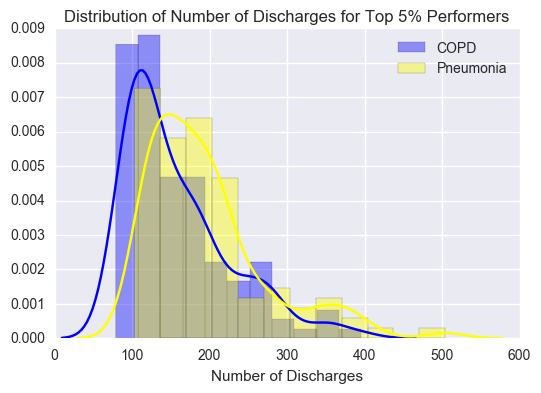

In [64]:
sns.distplot(copd_top_df.num_discharges, color='blue', label= 'COPD')
sns.distplot(pn_top_df.num_discharges, color='yellow', label='Pneumonia')
plt.legend()
plt.xlabel('Number of Discharges')
plt.title('Distribution of Number of Discharges for Top 5% Performers')

The top performers in these groups are hospitals with discharge numbers mostly below 300.

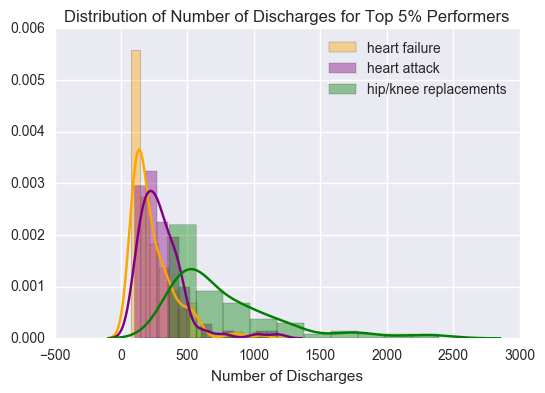

In [65]:
sns.distplot(hf_top_df.num_discharges, color='orange', label ='heart failure')
sns.distplot(ami_top_df.num_discharges, color='purple', label='heart attack')
sns.distplot(hip_knee_top_df.num_discharges, color='green', label = 'hip/knee replacements')
plt.legend()
plt.xlabel('Number of Discharges')
plt.title('Distribution of Number of Discharges for Top 5% Performers')

The top performers in heart attack and pneumonia have discharge numbers below 500 and top performers in hip and knee replacements have discharge numbers mostly below 1500.  We conclude that there are many top performing hospitals with smaller discharge numbers.

Let's create a plot illustrating the top and bottom performers related to their number of discharges for each treatment group.

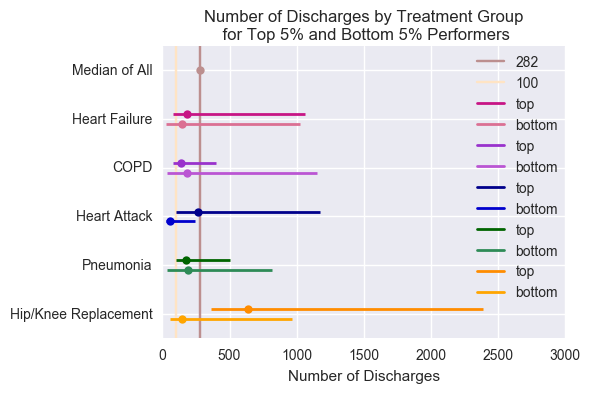

In [66]:

plt.axis([0,3000, 0, 12])

labels = ['Hip/Knee Replacement', 'Pneumonia', 'Heart Attack', 'COPD', 'Heart Failure', 'Median of All']
y = [1, 3, 5, 7, 9, 11]
plt.yticks(y,labels)

plt.vlines(ymin = 0, ymax = 12,x=clean_hospital_read_df.num_discharges.median(), color='rosybrown', label='282')
plt.vlines(ymin = 0, ymax = 12,x=100, color='bisque', label='100')
plt.plot([clean_hospital_read_df.num_discharges.median()],[11],marker='o', markersize=6, color= 'rosybrown')

plt.hlines(xmin=hf_top_df.num_discharges.min(), xmax=hf_top_df.num_discharges.max() ,y = 9.2,linewidth=2.0,
           color="mediumvioletred", label='top' )
plt.plot([hf_top_df.num_discharges.median()], [9.2], marker='o', markersize=6, color="mediumvioletred")
plt.hlines(xmin=hf_poor_df.num_discharges.min(), xmax=hf_poor_df.num_discharges.max() ,y = 8.8,linewidth=2.0,
           color="palevioletred", label='bottom' )
plt.plot([hf_poor_df.num_discharges.median()], [8.8], marker='o', markersize=6, color="palevioletred")

plt.hlines(xmin=copd_top_df.num_discharges.min(), xmax=copd_top_df.num_discharges.max() ,y = 7.2,linewidth=2.0,
           color="darkorchid", label='top' )
plt.plot([copd_top_df.num_discharges.median()], [7.2], marker='o', markersize=6, color="darkorchid")
plt.hlines(xmin=copd_poor_df.num_discharges.min(), xmax=copd_poor_df.num_discharges.max() ,y = 6.8,linewidth=2.0,
           color="mediumorchid", label='bottom' )
plt.plot([copd_poor_df.num_discharges.median()], [6.8], marker='o', markersize=6, color="mediumorchid")

plt.hlines(xmin=ami_top_df.num_discharges.min(), xmax=ami_top_df.num_discharges.max() ,y = 5.2,linewidth=2.0,
           color="darkblue", label='top' )
plt.plot([ami_top_df.num_discharges.median()], [5.2], marker='o', markersize=6, color="darkblue")
plt.hlines(xmin=ami_poor_df.num_discharges.min(), xmax=ami_poor_df.num_discharges.max() ,y = 4.8,linewidth=2.0,
           color="mediumblue", label='bottom' )
plt.plot([ami_poor_df.num_discharges.median()], [4.8], marker='o', markersize=6, color="mediumblue")

plt.hlines(xmin=pn_top_df.num_discharges.min(), xmax=pn_top_df.num_discharges.max() ,y = 3.2,linewidth=2.0,
           color="darkgreen", label='top' )
plt.plot([pn_top_df.num_discharges.median()], [3.2], marker='o', markersize=6, color="darkgreen")
plt.hlines(xmin=pn_poor_df.num_discharges.min(), xmax=pn_poor_df.num_discharges.max() ,y = 2.8,linewidth=2.0,
           color="seagreen", label='bottom' )
plt.plot([pn_poor_df.num_discharges.median()], [2.8], marker='o', markersize=6, color="seagreen")

plt.hlines(xmin=hip_knee_top_df.num_discharges.min(), xmax=hip_knee_top_df.num_discharges.max() ,y = 1.2,linewidth=2.0,
           color="darkorange", label='top' )
plt.plot([hip_knee_top_df.num_discharges.median()], [1.2], marker='o', markersize=6, color="darkorange")
plt.hlines(xmin=hip_knee_poor_df.num_discharges.min(), xmax=hip_knee_poor_df.num_discharges.max() ,y = 0.8,linewidth=2.0,
           color="orange", label='bottom' )
plt.plot([hip_knee_poor_df.num_discharges.median()], [0.8], marker='o', markersize=6, color="orange")
#plt.legend(loc='best')
plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.55))
plt.title('Number of Discharges by Treatment Group\n for Top 5% and Bottom 5% Performers')
plt.xlabel('Number of Discharges')
plt.tight_layout()
plt.savefig('Dischargesbygroup.png')

There is overlap between top and bottom performing hospitals in terms of their discharge numbers.  Therefore, if we were to recommend a policy bbased on discharge numbers that resulted in the closure of certain hospitals, that policy would inadvertently target top performing hospitals as well.

Now let's create a dataframe that contains the original set of hospitals minus the set of hospitals we identified as bottom performers.  We can plot the actual readmission rate versus the expected readmission rate and compare to the original.

In [67]:
# Subtract the df of bad hospitals from the df of all hospitals and then plot
clean_hospital_minus_bottom5 = clean_hospital_read_df.append(all_poor_df)
clean_hospital_minus_bottom5 = clean_hospital_minus_bottom5[~clean_hospital_minus_bottom5.duplicated(keep=False)]

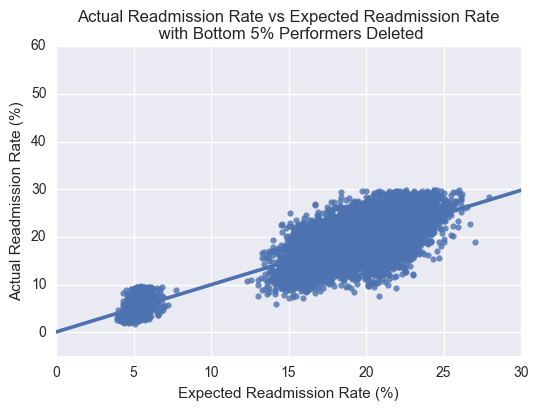

In [68]:
sns.regplot(x="expect_readmit_rate", y='actual_readmit_rate', data=clean_hospital_minus_bottom5)
plt.title('Actual Readmission Rate vs Expected Readmission Rate\n with Bottom 5% Performers Deleted')
plt.xlabel('Expected Readmission Rate (%)')
plt.ylabel('Actual Readmission Rate (%)')
plt.axis([0,30, -5, 60])
plt.savefig('actual_vs_expected_w_bottom5_deleted.png')

Let's repeat the analysis for bottom 10% perfomer.

In [69]:
# Repeat analysis for bottom 10% performers
# find the critical value or cut-off value for defining poor performers for alpha = 0.12
# for degrees of freedom use the smallest df of the group
# t_critical = ss.t.ppf(q = 1.0 - alpha, df = len(data) - 1)
t_critical = ss.t.ppf(q = 1.0 - 0.10, df = 1370)
print t_critical

1.2821698149


In [70]:
# create a function that will identify the bottom performers based on the num_std_dev input
# then subtract them from the original dataframe so we can plot the results for comparison purposes
def get_clean_minus_bottom(dict_of_df, num_std_dev):
    
    # identify bottom performers and store in a dictionary
    dict_of_lists_of_poor, dict_of_lists_of_top = get_info_all(dict_of_df, num_std_dev)  
    
    #capture the dataframes for each treatment group by naming them 
    copd_poor_df = dict_of_lists_of_poor['COPD']   
    ami_poor_df = dict_of_lists_of_poor['Heart Attack']
    hf_poor_df = dict_of_lists_of_poor['Heart Failure']
    pn_poor_df = dict_of_lists_of_poor['Pneumonia']
    hip_knee_poor_df = dict_of_lists_of_poor['Hip and Knee Replacements']
    
    # concatonate the df's of bottom performers
    all_poor_df = pd.concat([copd_poor_df, ami_poor_df, hf_poor_df, pn_poor_df, hip_knee_poor_df])
    
    # delete the bottom performers from original dataframe
    clean_hospital_minus_bottom = clean_hospital_read_df.append(all_poor_df)
    clean_hospital_minus_bottom = clean_hospital_minus_bottom[~clean_hospital_minus_bottom.duplicated(keep=False)]
    
    # return the resultant dataframe 
    return clean_hospital_minus_bottom

In [71]:
clean_hospital_minus_bottom10 = get_clean_minus_bottom(dict_of_df, 1.28)

Hip and Knee Replacements:
Bottom Perfomers:
139.0 hospitals or 10.0% have mean readmission rates 1.28 standard deviations above the mean.
The Actual Readmission Rates for these hospitals range from 8.54 to 19.30 percent.
The number of discharges for these hospitals ranges from 57 to 965 with a median of 170.0.


Top Perfomers:
136.0 hospitals or 10.0% have mean readmission rates 1.28 standard deviations below the mean.
The Actual Readmission Rates for these hospitals range from 1.78 to 3.47 percent.
The number of discharges for these hospitals ranges from 324 to 2393 with a median of 596.0.


Pneumonia:
Bottom Perfomers:
264.0 hospitals or 9.0% have mean readmission rates 1.28 standard deviations above the mean.
The Actual Readmission Rates for these hospitals range from 22.26 to 41.07 percent.
The number of discharges for these hospitals ranges from 34 to 1122 with a median of 221.5.


Top Perfomers:
249.0 hospitals or 9.0% have mean readmission rates 1.28 standard deviations below t

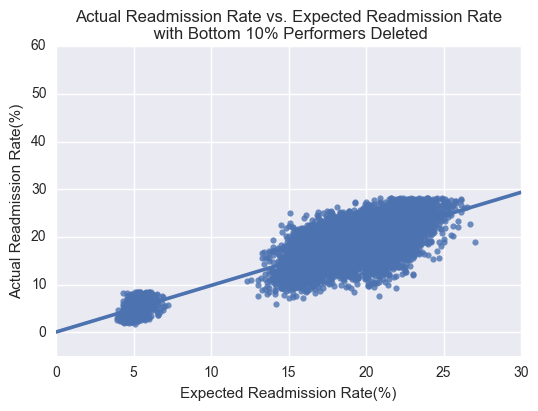

In [72]:
sns.regplot(x="expect_readmit_rate", y='actual_readmit_rate', data=clean_hospital_minus_bottom10)
plt.title('Actual Readmission Rate vs. Expected Readmission Rate\n with Bottom 10% Performers Deleted')
plt.xlabel('Expected Readmission Rate(%)')
plt.ylabel('Actual Readmission Rate(%)')
plt.axis([0,30, -5, 60])
plt.savefig('actual_vs_expected_w_bottom10_deleted')

# V. Conclusions and Recommendations

## A. Conclusions
I. The distributions of the readmission rates were found to be multi-modal so the data was stratified and the analysis was performed on each treatment group separately.
    

![Alt Text](dist_actual_readmit_rates.png)

II. Creating a linear regression plot for correlation between number of discharges and the excess readmission ratio for each treatment group shows that for three of the treatment groups (COPD, pneumonia, and heart failure), there is a small positive correlation meaning that smaller hospitals have lower excess readmission ratio, and for the other two treatment groups(hip and knee replacements and heart attack), there is a negative correlation meaning that as the number of discharges increase the excess readmission ratio goes down.  However, since the scatter plot did not illustrate an obvious linear relationship, we do this with caution.   

![Alt Text](excessratio_vs_dischares.png)

III. Statistical Analysis was done to determine the means and confidence intervals for each treatment group for their actual (observed) readmission rates and their expected readmission rates.  It was noted that the confidence intervals for the expected and actual means did not even overlap in four of the five treatment groups. Difference in means hypothesis testing proved that the expected means values are not "correct" or realistic for predicting the actual means.  There is almost a 0% likelihood that the actual means would be observed if the expected means were adopted as "correct" representations of the true means.

IV. A Chi-Squared Statistics analysis was performed using the raw numbers of hospital readmissions recorded versus the expected number of readmissions based on the expected readmission rates numbers. The results for each treatment group were p-values of 0, providing additional support for the conclusion that the expected readmission rates and excess readmission ratios are not "reasonable".

V.  Focusing on the observed (actual) data, a strategy was implemented for identifying the top and bottom performers based on how far away in standard deviations the hospital's readmission rate is in comparison to the mean. Because the distributions are not normal and asymetrical, it was necessary to use the log of the data for correctly identifying the top and bottom performers for the treatment groups whose distributions were the most skewed.  Those groups were the hip and knee replacements, heart attack, and pneumonia.


![Alt Text](Dischargesbygroup.png)

VI.  Finally, a plot was made of the actual versus expected readmission rates for a data set that had the bottom performers deleted to obtain a visual representation of the identification of the bottom performing hospitals.  

<tr>
    <td> <img src="actual_vs_exp_rates.png" alt="Drawing" style="height: 400px"/> </td>
    <td> <img src="actual_vs_expected_w_bottom5_deleted.png" alt="Drawing" style="height: 400px;"/> </td>
    </tr>

## B.  Recommendations

I.  Abandon the use of ratios to identify poor performers.  The ratio relies on a precise number and does not allow for 'normal' variations in readmission rates due to random events.  This inadvertently targets the wrong hospitals and creates the potential for unintended consequences such as patients in need of care having their treatment unnecessarily delayed.  It is known that a delay in treatment can result in complications that require even further care and further expense.

II. Rather than creating a system of "punishment", create a system of "reward" that incentivizes hosiptals to improve the quality of care they provide.  The study of Human Behavioral Sciences has proven that reward systems are more effective than punitive systems.

III.  Conduct a study on the top and bottom performers to investigate variables that could potentially affect performance:
    - educational levels, special trainings, and certifications of staff members
    - availability to updated equipment and tools
    - culture of the hospital/happiness of the staff

IV.  Study the top performing hospitals and develop a list of recommended 'Best Practices'.  

V.  If a reimbursement reduction program targeting "poor" performers is still considered, develop a better model for identifying the poor performers.  Since the distributions are not normal, a linear regression model is not going to be accurate.  Instead, develop a classification algorithm that can accommodate changing readmission rates month to month.